In [2]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

#Print the user here and the user's location here.
print(all_tweets.loc[0]["user"])
print(all_tweets.loc[0]["user"]["location"])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_cou

In [4]:
import numpy as np
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > all_tweets["retweet_count"].median(), 1, 0)
print(all_tweets["retweet_count"].median())
print(all_tweets['is_viral'].value_counts())

13.0
is_viral
0    5562
1    5537
Name: count, dtype: int64


In [6]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet: tweet['text'].count("#"), axis=1)
all_tweets['link_count'] = all_tweets.apply(lambda tweet: tweet['text'].count("http"), axis=1)

In [8]:
from sklearn.preprocessing import scale
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'hashtag_count', 'link_count']]
scaled_data = scale(data, axis=0)
print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305 -0.32045057 -0.78415588]


In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.7166666666666667


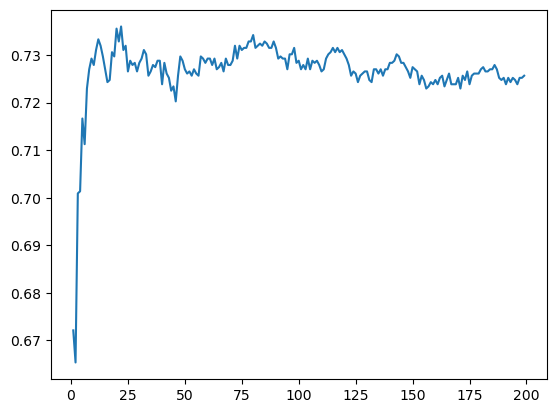

In [14]:
import matplotlib.pyplot as plt
scores = []
for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
plt.plot(range(1,200), scores)
plt.show()